**Machine Learning**

**Assignment 5**

**By: Noorulain**
**CMS-id= 023-19-0151**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

**Task 1**

Prepare the data to be fed to the model, use original images size, that is 32 x 32 

In [ ]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
labels = ['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']


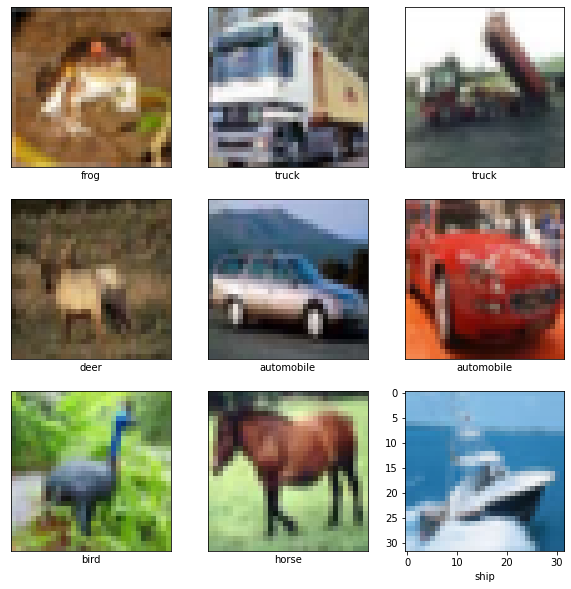

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i])
  plt.xlabel(labels[y_train[i][0]])
plt.show()

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
#Normalization
X_train = X_train/255
X_test = X_test/255

**Task 2 & 3**

Define a CNN with four Convolution Layers (16, 32, 64, 128) with kernal size 


Apply appropriate activation function at the last layer 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),  activation='relu',input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'softmax'))


**Task 4**

 Compile the model 

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Task 5**

Train it on 50 epochs using training images sparing 10% images for validation

In [ ]:
history = model.fit(X_train,y_train,epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 10s 5ms/step - loss: 1.5142 - accuracy: 0.4417 - val_loss: 1.2330 - val_accuracy: 0.5618
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0959 - accuracy: 0.6122 - val_loss: 1.0858 - val_accuracy: 0.6118
Epoch 3/50
1407/1407 [==============================] - 6s 5ms/step - loss: 0.9312 - accuracy: 0.6702 - val_loss: 0.8989 - val_accuracy: 0.6808
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8160 - accuracy: 0.7109 - val_loss: 0.8716 - val_accuracy: 0.6952
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7299 - accuracy: 0.7416 - val_loss: 0.8764 - val_accuracy: 0.6988
Epoch 6/50
1407/1407 [==============================] - 8s 6ms/step - loss: 0.6572 - accuracy: 0.7678 - val_loss: 0.8408 - val_accuracy: 0.7136
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5932 - accuracy: 0.7915 - val_loss: 0.8978 - val_accuracy

**Task 6**

Plot accuracy graph for training and validation 

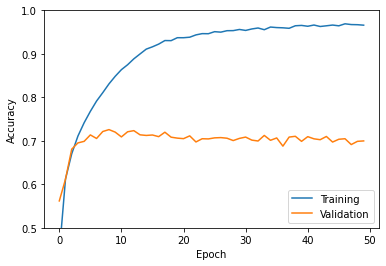

In [ ]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')

Here Model over fits on 9th epoch

**Task 7**

if model overfits, retrain on the revised number of epochs to overcome overfitting 

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),  activation='relu',input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=9, validation_split=0.1)

Epoch 1/9
1407/1407 [==============================] - 8s 5ms/step - loss: 1.5431 - accuracy: 0.4321 - val_loss: 1.2488 - val_accuracy: 0.5402
Epoch 2/9
1407/1407 [==============================] - 6s 5ms/step - loss: 1.1316 - accuracy: 0.5971 - val_loss: 1.0280 - val_accuracy: 0.6356
Epoch 3/9
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9454 - accuracy: 0.6642 - val_loss: 0.8992 - val_accuracy: 0.6836
Epoch 4/9
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8233 - accuracy: 0.7084 - val_loss: 0.9030 - val_accuracy: 0.6904
Epoch 5/9
1407/1407 [==============================] - 8s 5ms/step - loss: 0.7264 - accuracy: 0.7407 - val_loss: 0.8251 - val_accuracy: 0.7198
Epoch 6/9
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6522 - accuracy: 0.7691 - val_loss: 0.8468 - val_accuracy: 0.7118
Epoch 7/9
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5874 - accuracy: 0.7923 - val_loss: 0.8309 - val_accuracy: 0.7160

**Task 8**

Evaluate model on the test dataset and report test accuracy

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
test_acc

313/313 - 1s - loss: 0.9324 - accuracy: 0.7110 - 855ms/epoch - 3ms/step


0.7110000252723694

**Task 9**

Perform augmentation with at least five augmentation attributes (e.g. zoom, flip etc.)

In [ ]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.5, 1.5]
    )

In [ ]:
train_generator = datagen.flow(X_train, y_train, batch_size=6)

In [ ]:
train_generator.x.shape

(50000, 32, 32, 3)

In [ ]:
#Normalization
trainX = train_generator.x/255.0
trainY = train_generator.y


In [ ]:
trainY =trainY.reshape(-1,)
trainY

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

**Task 11**

Repeat 2-9 on augmented images

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),  activation='relu',input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(trainX,trainY,epochs=50, validation_split=0.1)


Epoch 1/50
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0964 - val_loss: 2.3026 - val_accuracy: 0.1064
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3030 - val_accuracy: 0.0976
Epoch 3/50
1407/1407 [==============================] - 6s 5ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0950
Epoch 4/50
1407/1407 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 5/50
1407/1407 [==============================] - 6s 5ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3024 - val_accuracy: 0.1064
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3029 - val_accuracy: 0.0958
Epoch 7/50
1407/1407 [==============================] - 6s 5ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3029 - val_accuracy:

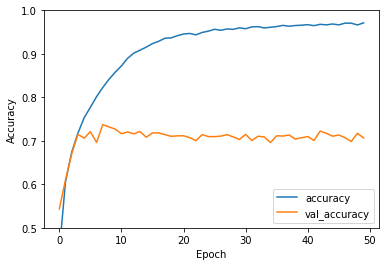

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')

In [ ]:
X_test = X_test/255
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
test_acc

313/313 - 1s - loss: 2.5187 - accuracy: 0.6957 - 761ms/epoch - 2ms/step


0.6956999897956848

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),  activation='relu',input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(trainX,trainY,epochs=9, validation_split=0.1)

Epoch 1/9
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4909 - accuracy: 0.4544 - val_loss: 1.1953 - val_accuracy: 0.5646
Epoch 2/9
1407/1407 [==============================] - 6s 5ms/step - loss: 1.1030 - accuracy: 0.6043 - val_loss: 1.0045 - val_accuracy: 0.6412
Epoch 3/9
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9250 - accuracy: 0.6736 - val_loss: 0.8937 - val_accuracy: 0.6842
Epoch 4/9
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8018 - accuracy: 0.7166 - val_loss: 0.8925 - val_accuracy: 0.6840
Epoch 5/9
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7140 - accuracy: 0.7472 - val_loss: 0.8127 - val_accuracy: 0.7176
Epoch 6/9
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6387 - accuracy: 0.7756 - val_loss: 0.8433 - val_accuracy: 0.7222
Epoch 7/9
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5732 - accuracy: 0.7977 - val_loss: 0.8563 - val_accuracy: 0.7116

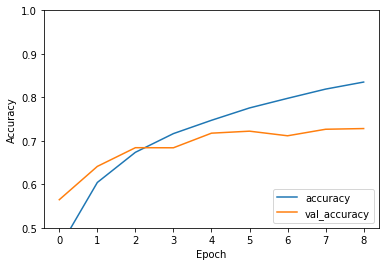

In [ ]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
test_acc

313/313 - 1s - loss: 0.9494 - accuracy: 0.7025 - 774ms/epoch - 2ms/step


0.7024999856948853

**Task 11**

Finally, use VGG-16 to leverage the power of pretrained networks by using both feature extraction as well as fine tuning methods

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
vgg_conv = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))

for layer in vgg_conv.layers:
  layer.trainable = False



58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
network = models.Sequential()

network.add(vgg_conv)

network.add(Flatten())

network.add(Dense(units=128,activation='relu'))
network.add(Dropout(0.3))

network.add(Dense(units=64,activation='relu'))
network.add(Dropout(0.3))

network.add(layers.Dense(units=10,activation='softmax'))

In [ ]:
network.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# history = network.fit(X_train_resized, y_train, epochs=12, validation_split=0.1)
history = network.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 17s 11ms/step - loss: 2.4940 - accuracy: 0.2866 - val_loss: 1.5233 - val_accuracy: 0.4656
Epoch 2/50
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6096 - accuracy: 0.4404 - val_loss: 1.3533 - val_accuracy: 0.5362
Epoch 3/50
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4624 - accuracy: 0.4989 - val_loss: 1.2856 - val_accuracy: 0.5730
Epoch 4/50
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3782 - accuracy: 0.5301 - val_loss: 1.2112 - val_accuracy: 0.5946
Epoch 5/50
1407/1407 [==============================] - 15s 11ms/step - loss: 1.3206 - accuracy: 0.5541 - val_loss: 1.2095 - val_accuracy: 0.5974
Epoch 6/50
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2865 - accuracy: 0.5679 - val_loss: 1.1771 - val_accuracy: 0.6038
Epoch 7/50
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2432 - accuracy: 0.5776 - val_loss: 1.1677 -

In [ ]:
test_loss, test_acc = network.evaluate(X_test,  y_test, verbose=2)
test_acc

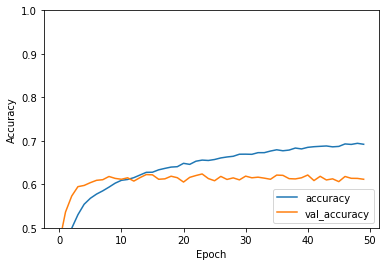

In [ ]:
plt.plot(history.history['accuracy'], label='Traing')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')

In [ ]:
network = models.Sequential()

network.add(vgg_conv)

network.add(Flatten())

network.add(Dense(units=128,activation='relu'))
network.add(Dropout(0.3))

network.add(Dense(units=64,activation='relu'))
network.add(Dropout(0.3))

network.add(layers.Dense(units=10,activation='softmax'))

network.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = network.fit(X_train, y_train, epochs=27, validation_split=0.1)

Epoch 1/27
1407/1407 [==============================] - 17s 11ms/step - loss: 2.5810 - accuracy: 0.2441 - val_loss: 1.6227 - val_accuracy: 0.4324
Epoch 2/27
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6573 - accuracy: 0.4127 - val_loss: 1.3531 - val_accuracy: 0.5314
Epoch 3/27
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4911 - accuracy: 0.4817 - val_loss: 1.2624 - val_accuracy: 0.5694
Epoch 4/27
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4047 - accuracy: 0.5195 - val_loss: 1.2469 - val_accuracy: 0.5846
Epoch 5/27
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3474 - accuracy: 0.5394 - val_loss: 1.2122 - val_accuracy: 0.5942
Epoch 6/27
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3075 - accuracy: 0.5557 - val_loss: 1.1896 - val_accuracy: 0.5992
Epoch 7/27
1407/1407 [==============================] - 15s 11ms/step - loss: 1.2613 - accuracy: 0.5737 - val_loss: 1.1667 -

In [ ]:
test_loss, test_acc = network.evaluate(X_test,  y_test, verbose=2)
test_acc

313/313 - 3s - loss: 2.3268 - accuracy: 0.1449 - 3s/epoch - 10ms/step


0.14489999413490295

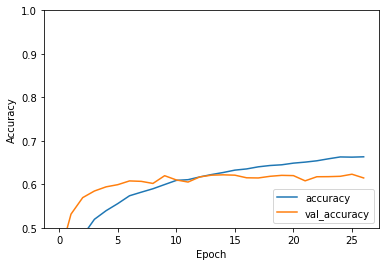

In [ ]:
plt.plot(history.history['accuracy'], label='Traing')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')